In [16]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

from sklearn.metrics import classification_report, precision_score, recall_score, accuracy_score, confusion_matrix,f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

import time

In [2]:
df = pd.read_csv('./dataset/inflearn_creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0:00:00,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.008105,0
1,0:00:00,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.989913,0
2,0:00:24,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.936641,0
3,0:00:24,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.816249,0
4,0:00:48,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,4.248367,0


In [3]:
fraud = df[df['Class'] == 1].copy()
normal = df[df['Class'] == 0].copy()

outlier_fraction = len(fraud)/float(len(normal))

fraud.shape, normal.shape

((473, 31), (283253, 31))

In [4]:
X = df.drop(['Time','Class'], axis=1).values
y = df['Class'].values
X.shape, y.shape

((283726, 29), (283726,))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.5, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((141863, 29), (141863, 29), (141863,), (141863,))

In [6]:
# fraud data 비율
sum(y_train == 1) / len(y_train)

0.001769312646708444

# Local Outlier Factor(LOF) Algorithm

In [7]:
%%time

lof = LocalOutlierFactor(contamination=outlier_fraction, novelty=True).fit(X_train)
lof

CPU times: total: 17min 23s
Wall time: 19min 24s


LocalOutlierFactor(contamination=0.0016698852262818046, novelty=True)

In [8]:
%%time
y_pred_lof = lof.predict(X_test)

print("LOF 의 분류 값 :", np.unique(y_pred_lof))
print("1 로 분류된 sample 수:", sum(y_pred_lof == 1))
print("-1 로 분류된 sample 수:", sum(y_pred_lof == -1))

LOF 의 분류 값 : [-1  1]
1 로 분류된 sample 수: 141648
-1 로 분류된 sample 수: 215
CPU times: total: 16min 29s
Wall time: 18min 34s


In [23]:
y_pred_lof[y_pred_lof == 1] = 0
y_pred_lof[y_pred_lof == -1] = 1

print(classification_report(y_test, y_pred_lof))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    141641
           1       0.00      0.00      0.00       222

    accuracy                           1.00    141863
   macro avg       0.50      0.50      0.50    141863
weighted avg       1.00      1.00      1.00    141863



C:\Users\syeon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Isolation Forest Algorithm

In [10]:
%%time
isof = IsolationForest(contamination=outlier_fraction).fit(X_train)

CPU times: total: 31.3 s
Wall time: 36.3 s


In [11]:
%%time
y_pred_isof = isof.predict(X_test)

print("ISOF 의 분류 값 :", np.unique(y_pred_isof))
print("1 로 분류된 sample 수:", sum(y_pred_isof == 1))
print("-1 로 분류된 sample 수:", sum(y_pred_isof == -1))

ISOF 의 분류 값 : [-1  1]
1 로 분류된 sample 수: 141621
-1 로 분류된 sample 수: 242
CPU times: total: 16.3 s
Wall time: 19.3 s


In [24]:
y_pred_isof[y_pred_isof == 1] = 0
y_pred_isof[y_pred_isof == -1] = 1

print(classification_report(y_test, y_pred_lof))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    141641
           1       0.00      0.00      0.00       222

    accuracy                           1.00    141863
   macro avg       0.50      0.50      0.50    141863
weighted avg       1.00      1.00      1.00    141863



# Model 비교

In [21]:
predictions = {"lof": y_pred_lof, "isof": y_pred_isof}

lof: 222
f1 score: 0.00000
Accuracy Score : 0.99844
Precision Score: 0.00000
Recall Score   : 0.00000



C:\Users\syeon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


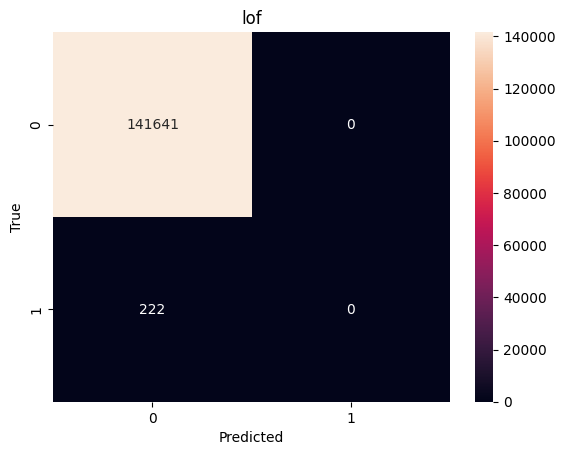

isof: 222
f1 score: 0.00000
Accuracy Score : 0.99844
Precision Score: 0.00000
Recall Score   : 0.00000



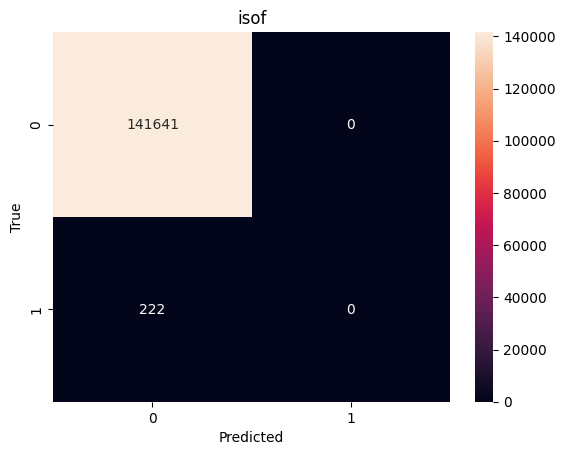

In [25]:
for clf_name, y_pred in predictions.items():
    
    n_errors = (y_pred != y_test).sum()
    
    # Run Classification Metrics
    print(f"{clf_name}: {n_errors}")
    print(f"f1 score: {f1_score(y_test, y_pred):.5f}")
    print(f"Accuracy Score : {accuracy_score(y_test, y_pred):.5f}")
    print(f"Precision Score: {precision_score(y_test, y_pred):.5f}")
    print(f"Recall Score   : {recall_score(y_test, y_pred):.5f}")
    print()

    cm = confusion_matrix(y_test, y_pred)
    plt.figure()
    ax = sns.heatmap(cm, annot=True, fmt='d')
    ax.set_title(clf_name)
    ax.set_ylabel('True')
    ax.set_xlabel('Predicted')
    plt.show()